# Brazil (Cities) Basic Geographic Analysis
- by Marcelo Rovai
- 22 April 2020

## Main Libraries and setup

In [15]:
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
from shapely.geometry import Point, Polygon
from unicodedata import normalize
import datetime
import time
import requests

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
print("Python Version:    ", python_version()) 
print("Pandas Version:    ", pd.__version__) 
print("GeoPandas Version: ", gpd.__version__) 

Python Version:     3.7.7
Pandas Version:     0.25.1
GeoPandas Version:  0.7.0


In [18]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.float_format = '{:,}'.format
mpl.rcParams['figure.dpi']= 150
plt.style.use('seaborn-paper')

**Special Colors**

In [ ]:
red_mjr = '#F66721'
blue_mjr = '#1F51A1'
light_blue_mjr = '#8DC8E8'
orange_mjr = '#F7A301'
light_orange_mjr = '#FADC5C'
light_gray_mjr = '#D9D9D9'

## General Functions 

## Datasets

### Brazilian Population by city

Data from [IBGE - Estimativas da População](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=25272&t=downloads)

Explanation: [Lista de municípios do Brasil por população - Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_população)

In [19]:
br_pop = pd.read_excel('../data/IBGE_Brazil_Population_Estimation_2019.xlsx')
br_pop.shape

(5570, 6)

In [20]:
br_pop.head()

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  COD. IBGE  \
0  RO       11          15  Alta Floresta D'Oeste    1100015   
1  RO       11          23              Ariquemes    1100023   
2  RO       11          31                 Cabixi    1100031   
3  RO       11          49                 Cacoal    1100049   
4  RO       11          56             Cerejeiras    1100056   

   POPULAÇÃO ESTIMADA  
0               22945  
1              107863  
2                5312  
3               85359  
4               16323

In [21]:
br_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
UF                    5570 non-null object
COD. UF               5570 non-null int64
COD. MUNIC            5570 non-null int64
NOME DO MUNICÍPIO     5570 non-null object
COD. IBGE             5570 non-null int64
POPULAÇÃO ESTIMADA    5570 non-null int64
dtypes: int64(4), object(2)
memory usage: 261.2+ KB


In [22]:
print('Number of Brazilian cities: {:,}'.format(len(br_pop)))
print('Total Brazilian population: {:,}'.format(br_pop['POPULAÇÃO ESTIMADA'].sum()))

Number of Brazilian cities: 5,570
Total Brazilian population: 210,147,125


## GeoData (Brasil & Municipalities)

In [23]:
!ls ../geo_data

BRMUE250GC_SIR.cpg BRMUE250GC_SIR.shp Municipios         ww_json
BRMUE250GC_SIR.dbf BRMUE250GC_SIR.shx estados
BRMUE250GC_SIR.prj Brasil             out_data


**States**

In [24]:
br_shp = gpd.read_file('../geo_data/Brasil/UFEBRASIL.shp')
br_shp.shape

(27, 5)

In [25]:
br_shp.rename(columns={'CD_GEOCODU': 'COD. UF'}, inplace=True)
br_shp['COD. UF'] = br_shp['COD. UF'].astype('int64')
br_shp.head(2)

ID  COD. UF NM_ESTADO NM_REGIAO  \
0   1       11  RONDÔNIA     NORTE   
1   2       12      ACRE     NORTE   

                                            geometry  
0  POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...  
1  POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...

In [26]:
br_shp

ID  COD. UF            NM_ESTADO     NM_REGIAO  \
0    1       11             RONDÔNIA         NORTE   
1    2       12                 ACRE         NORTE   
2    3       13             AMAZONAS         NORTE   
3    4       14              RORAIMA         NORTE   
4    5       15                 PARÁ         NORTE   
5    6       16                AMAPÁ         NORTE   
6    1       17            TOCANTINS         NORTE   
7    1       21             MARANHÃO      NORDESTE   
8    1       22                PIAUÍ      NORDESTE   
9    2       23                CEARÁ      NORDESTE   
10   2       24  RIO GRANDE DO NORTE      NORDESTE   
11   3       25              PARAÍBA      NORDESTE   
12   3       26           PERNAMBUCO      NORDESTE   
13   1       27              ALAGOAS      NORDESTE   
14   2       28              SERGIPE      NORDESTE   
15   4       29                BAHIA      NORDESTE   
16   4       31         MINAS GERAIS       SUDESTE   
17   5       32       ESPIRITO SANTO       SUDESTE   
18   5       33       RIO DE JANEIRO       SUDESTE   
19   6       35            SÃO PAULO       SUDESTE   
20   3       41               PARANÁ           SUL   
21   4       42       SANTA CATARINA           SUL   
22   5       43    RIO GRANDE DO SUL           SUL   
23   2       50   MATO GROSSO DO SUL  CENTRO-OESTE   
24   3       51          MATO GROSSO  CENTRO-OESTE   
25   4       52                GOIÁS  CENTRO-OESTE   
26   5       53     DISTRITO FEDERAL  CENTRO-OESTE   

                                             geometry  
0   POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...  
1   POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...  
2   POLYGON ((-67.32609 2.02971, -67.31682 2.00125...  
3   POLYGON ((-60.20051 5.26434, -60.19828 5.26045...  
4   MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...  
5   MULTIPOLYGON (((-51.17970 4.00008, -51.17784 3...  
6   POLYGON ((-48.35878 -5.17008, -48.35315 -5.173...  
7   MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...  
8   POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...  
9   POLYGON ((-41.16703 -4.46736, -41.16220 -4.466...  
10  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...  
11  MULTIPOLYGON (((-37.22269 -6.04215, -37.21970 ...  
12  MULTIPOLYGON (((-32.39705 -3.83294, -32.39693 ...  
13  POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...  
14  POLYGON ((-37.99245 -9.52511, -37.98933 -9.527...  
15  MULTIPOLYGON (((-39.36446 -8.53785, -39.36047 ...  
16  POLYGON ((-41.87545 -20.76487, -41.87503 -20.7...  
17  MULTIPOLYGON (((-41.87545 -20.76487, -41.87712...  
18  MULTIPOLYGON (((-41.85946 -20.76517, -41.85929...  
19  MULTIPOLYGON (((-46.27516 -24.01595, -46.27551...  
20  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...  
21  MULTIPOLYGON (((-48.63865 -25.96873, -48.63799...  
22  POLYGON ((-51.90486 -27.45935, -51.90569 -27.4...  
23  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...  
24  POLYGON ((-54.89485 -17.62150, -54.89414 -17.5...  
25  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...  
26  POLYGON ((-47.57461 -15.51341, -47.56997 -15.5...

In [31]:
br_shp.crs

<Geographic 2D CRS: GEOGCS["SIRGAS 2000",DATUM["SIRGAS2000",SPHEROID[" ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: SIRGAS2000
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

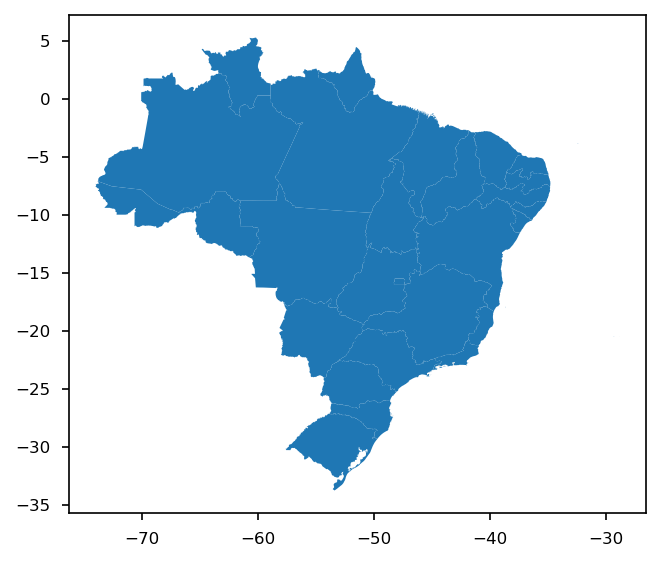

In [32]:
br_shp.plot();

**Cities**

In [60]:
mun_shp = gpd.read_file('../geo_data/BRMUE250GC_SIR.shp', encoding = 'utf-8')
mun_shp.shape

(5572, 3)

In [61]:
mun_shp.rename(columns = {'CD_GEOCMU': 'COD. IBGE'}, inplace=True)
mun_shp['COD. IBGE'] = mun_shp['COD. IBGE'].astype('int64')
mun_shp.head(2)

NM_MUNICIP  COD. IBGE  \
0     CACHOEIRA DO PIRIÁ    1501956   
1  SÃO JOSÉ DOS BASÍLIOS    2111250   

                                            geometry  
0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...  
1  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...

In [62]:
mun_shp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

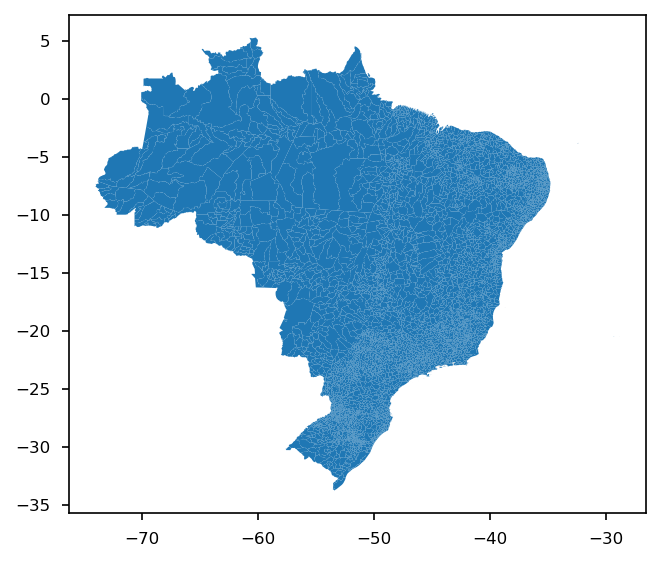

In [63]:
mun_shp.plot();

## Creating a single Dataset with Population, territory and population density

**Calculating aprox. city areas in m2**
- For a real area calculation: [Lista de municípios brasileiros por área decrescente - Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_brasileiros_por_área_decrescente)

In [41]:
tost = mun_shp.copy()
tost = tost.to_crs(epsg=3395)
tost["area"] = tost['geometry'].area/ 10**6
del tost['NM_MUNICIP']
del tost['geometry']
tost.head(2)

COD. IBGE                area
0    1501956 2,422.5106761430625
1    2111250   355.9684085285142

In [64]:
br_cities = pd.merge(br_pop, tost, on='COD. IBGE')
br_cities.shape

(5570, 7)

In [65]:
br_cities.head()

UF  COD. UF  COD. MUNIC      NOME DO MUNICÍPIO  COD. IBGE  \
0  RO       11          15  Alta Floresta D'Oeste    1100015   
1  RO       11          23              Ariquemes    1100023   
2  RO       11          31                 Cabixi    1100031   
3  RO       11          49                 Cacoal    1100049   
4  RO       11          56             Cerejeiras    1100056   

   POPULAÇÃO ESTIMADA                area  
0               22945  7,410.660062204445  
1              107863  4,561.932748992908  
2                5312 1,389.3383314598766  
3               85359  3,943.573953832172  
4               16323 2,935.4052852522486

In [66]:
del br_cities['COD. MUNIC']
br_cities.rename(columns={'area': 'AREA APROX.'}, inplace=True)
br_cities['AREA APROX.'] = round(br_cities['AREA APROX.'], 2)
br_cities['DENS. DEMOG.'] = round(br_cities['POPULAÇÃO ESTIMADA'] / br_cities['AREA APROX.'], 2)
br_cities.head(2)

UF  COD. UF      NOME DO MUNICÍPIO  COD. IBGE  POPULAÇÃO ESTIMADA  \
0  RO       11  Alta Floresta D'Oeste    1100015               22945   
1  RO       11              Ariquemes    1100023              107863   

   AREA APROX.  DENS. DEMOG.  
0     7,410.66           3.1  
1     4,561.93         23.64

In [67]:
br_cities = pd.merge(mun_shp, br_cities, on='COD. IBGE')

In [68]:
br_cities.head(2)

NM_MUNICIP  COD. IBGE  \
0     CACHOEIRA DO PIRIÁ    1501956   
1  SÃO JOSÉ DOS BASÍLIOS    2111250   

                                            geometry  UF  COD. UF  \
0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...  PA       15   
1  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...  MA       21   

       NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA  AREA APROX.  DENS. DEMOG.  
0     Cachoeira do Piriá               33900     2,422.51         13.99  
1  São José dos Basílios                7641       355.97         21.47

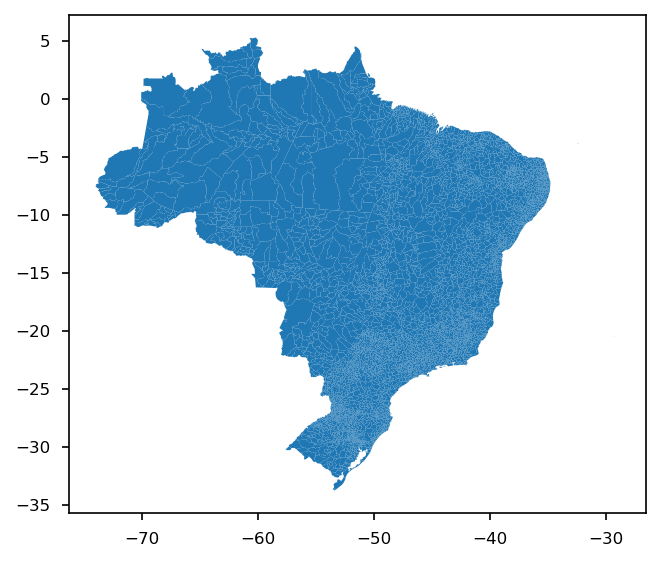

In [69]:
br_cities.plot();

In [71]:
br_cities.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [70]:
print('Number of Brazilian Cities: {:,}'.format(len(br_cities.index)))
print('Total Brazilian Population: {:,}'.format(
    br_cities['POPULAÇÃO ESTIMADA'].sum()))
print('Total Brazilian Territory : {:,} km2 (aprox.)'.format(
    round(br_cities['AREA APROX.'].sum())))
print('Average Demografic Density : {:,} hab/km2 (aprox.)'.format(
    round((br_cities['POPULAÇÃO ESTIMADA'].sum()) /
          (br_cities['AREA APROX.'].sum()))))

Number of Brazilian Cities: 5,570
Total Brazilian Population: 210,147,125
Total Brazilian Territory : 8,985,590.0 km2 (aprox.)
Average Demografic Density : 23.0 hab/km2 (aprox.)


In [73]:
br_cities.to_file('../data_out/10_geodata/10_Brazil_by_City/Brazil_Dataset_By_City.shp', encoding='utf-8')

### Alternative dataset with Point

In [74]:
br_cities_pnt = br_cities.copy()
br_cities_pnt['geometry'] = br_cities_pnt['geometry'].representative_point()

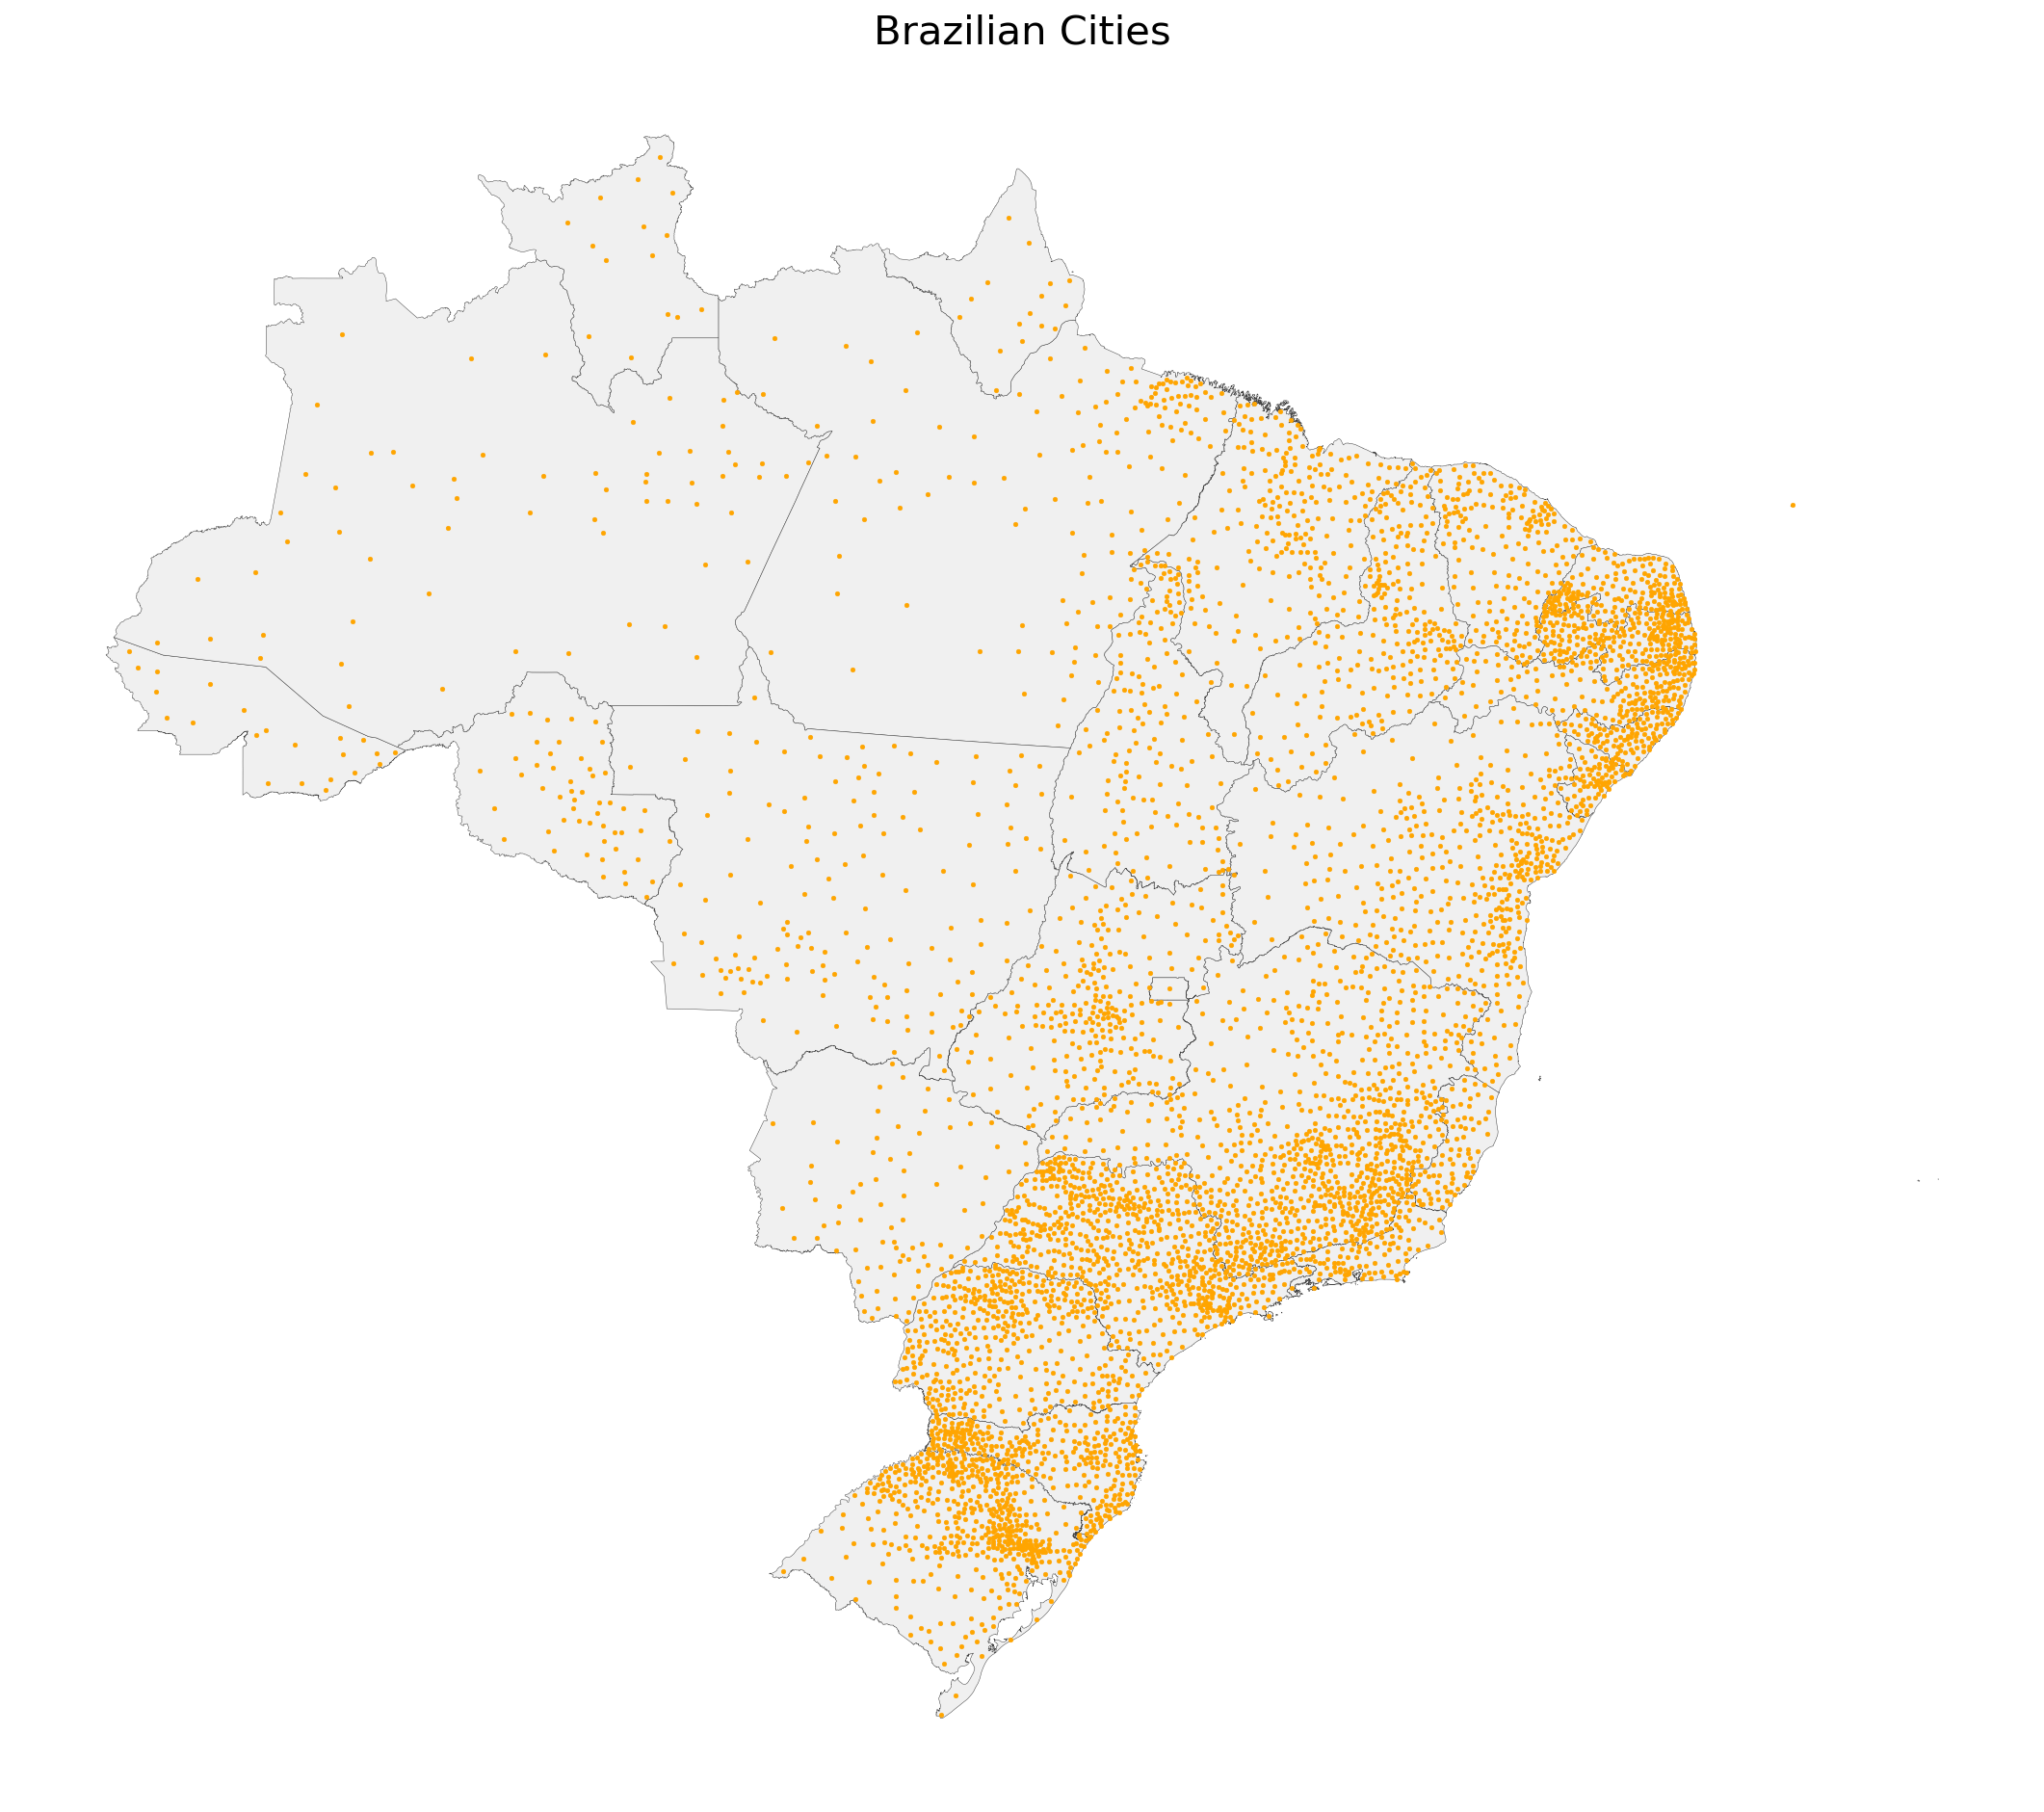

In [78]:
ax = br_shp.plot(figsize=(18, 16), color='#F0F0F0', edgecolor='#444444')
br_cities_pnt.plot(ax=ax, color="orange", markersize=5, label='City')
plt.title("Brazilian Cities", fontsize = 20);
plt.axis('off');

### Grouping State data

In [79]:
br_cities.head(2)

NM_MUNICIP  COD. IBGE  \
0     CACHOEIRA DO PIRIÁ    1501956   
1  SÃO JOSÉ DOS BASÍLIOS    2111250   

                                            geometry  UF  COD. UF  \
0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...  PA       15   
1  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...  MA       21   

       NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA  AREA APROX.  DENS. DEMOG.  
0     Cachoeira do Piriá               33900     2,422.51         13.99  
1  São José dos Basílios                7641       355.97         21.47

In [80]:
br_state = br_cities.groupby('UF', as_index=False).agg({
    'COD. UF': 'first',
    'NOME DO MUNICÍPIO': 'count',
    'POPULAÇÃO ESTIMADA': 'sum',
    'AREA APROX.': 'sum'
})
br_state.shape

(27, 5)

In [81]:
br_state.rename(columns={'NOME DO MUNICÍPIO':'QTD MUNICÍPIOS'}, inplace=True)
br_state['DENS. DEMOG.'] = round(br_state['POPULAÇÃO ESTIMADA'] / br_state['AREA APROX.'], 2)
br_state['AREA APROX.'] = round(br_state['AREA APROX.'], 2)
br_state

UF  COD. UF  QTD MUNICÍPIOS  POPULAÇÃO ESTIMADA  AREA APROX.  DENS. DEMOG.
0   AC       12              22              881935   168,458.35          5.24
1   AL       27             102             3337357    28,621.12         116.6
2   AM       13              62             4144597  1,571,148.4          2.64
3   AP       16              16              845731   142,618.28          5.93
4   BA       29             417            14873064   592,928.26         25.08
5   CE       23             184             9132078   150,137.08         60.82
6   DF       53               1             3015268     6,217.88        484.94
7   ES       32              78             4018650     51,875.9         77.47
8   GO       52             246             7018354   368,391.83         19.05
9   MA       21             217             7075181   332,594.66         21.27
10  MG       31             853            21168791    652,288.4         32.45
11  MS       50              79             2778986   406,164.05          6.84
12  MT       51             141             3484466   952,334.52          3.66
13  PA       15             144             8602865 1,255,358.39          6.85
14  PB       25             223             4018127    57,345.94         70.07
15  PE       26             185             9557071   100,160.66         95.42
16  PI       22             224             3273227   256,084.83         12.78
17  PR       41             399            11433957    241,027.6         47.44
18  RJ       33              92            17264943    50,989.86         338.6
19  RN       24             167             3506853    53,361.77         65.72
20  RO       11              52             1777225   246,684.97           7.2
21  RR       14              15              605761   224,721.09           2.7
22  RS       43             497            11377239   355,809.53         31.98
23  SC       42             295             7164788    120,972.9         59.23
24  SE       28              75             2298696    22,689.08        101.31
25  SP       35             645            45919049    289,706.7         158.5
26  TO       17             139             1572866   286,897.88          5.48

In [82]:
print('Number of Brazilian Cities: {:,}'.format(br_state['QTD MUNICÍPIOS'].sum()))
print('Total Brazilian Population: {:,}'.format(br_state['POPULAÇÃO ESTIMADA'].sum()))
print('Total Brazilian Territory : {:,} km2 (aprox.)'.format(round(br_state['AREA APROX.'].sum())))

Number of Brazilian Cities: 5,570
Total Brazilian Population: 210,147,125
Total Brazilian Territory : 8,985,590.0 km2 (aprox.)


In [83]:
br_state = pd.merge(br_shp, br_state, on='COD. UF')
br_state.shape

(27, 10)

In [117]:
def clean_col (row):
    source = row['NM_ESTADO']
    clean = normalize("NFKD", source).encode('ASCII','ignore').decode('ASCII')
    row['NM_ESTADO'] = clean
    return row

In [124]:
br_state = br_state.apply(clean_col, axis=1)
br_state.rename(
    columns={
        'QTD MUNICÍPIOS': 'QTD_MUN',
        'POPULAÇÃO ESTIMADA': 'POP_2019',
        'AREA APROX.': 'AREA_APROX',
        'DENS. DEMOG.': 'DENS_DEMOG'
    }, inplace=True)

In [125]:
br_state.to_file('../data_out/10_geodata/20_Brazil_by_State/Brazil_Dataset_By_State.shp')

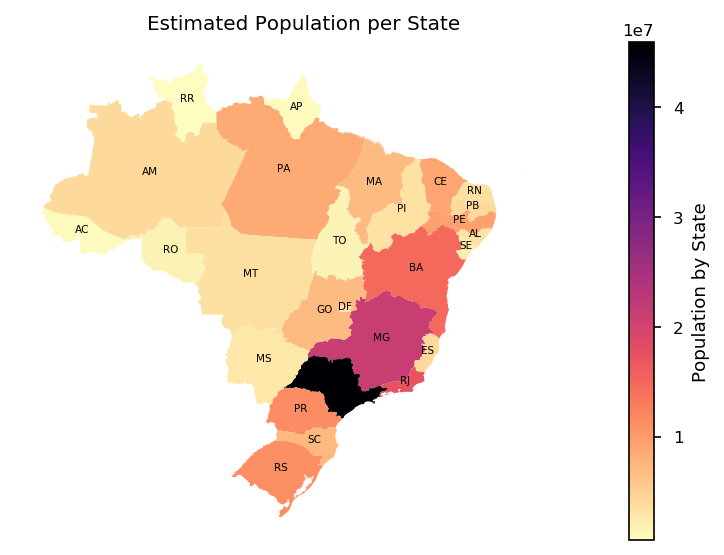

In [91]:
ax = br_state.plot(column='POPULAÇÃO ESTIMADA',
                   cmap='magma_r',
                   legend=True,
                   legend_kwds={
                       'label': "Population by State",
                       'orientation': "vertical"
                   })
plt.title("Estimated Population per State")
ax.set_axis_off()
for idx, row in br_state.iterrows():
    plt.annotate(s=row['UF'],
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center',
                 fontsize=5)

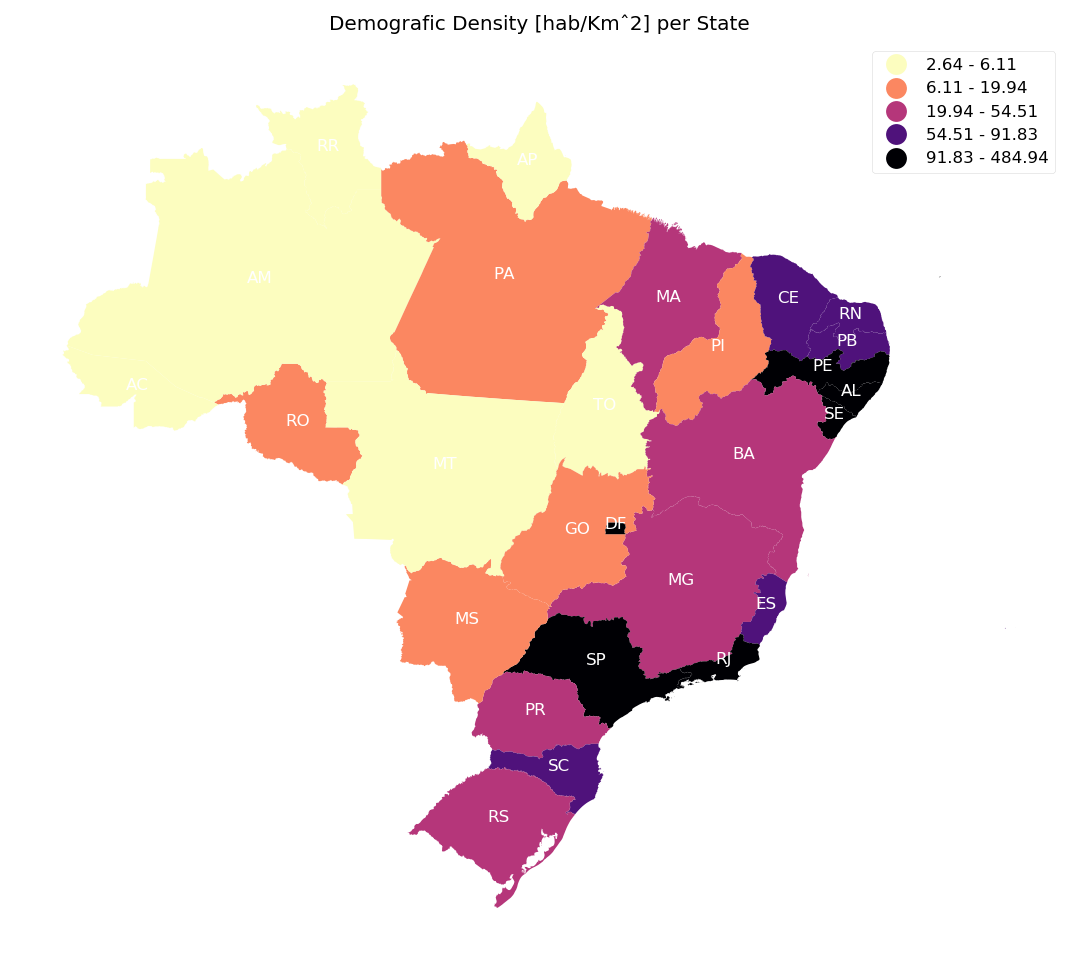

In [102]:
ax = br_state.plot(column='DENS. DEMOG.',
                   cmap='magma_r',
                   scheme='quantiles',
                   legend=True,
                   figsize=(12, 8))
plt.title("Demografic Density [hab/Kmˆ2] per State")
ax.set_axis_off()
for idx, row in br_state.iterrows():
    plt.annotate(s=row['UF'],
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center',
                 fontsize=8,
                 color='white')

## Getting POIs

OpenStreetMap data from:
http://download.geofabrik.de/south-america/brazil.html

In [103]:
!ls ../OSM

brazil-140101-free       nordeste-latest-free     sudeste-latest-free
centro-oeste-latest-free norte-latest-free        sul-latest-free


**SouthEast Roads**

In [104]:
!ls ../OSM/sudeste-latest-free

README                         gis_osm_pois_free_1.cpg
gis_osm_buildings_a_free_1.cpg gis_osm_pois_free_1.dbf
gis_osm_buildings_a_free_1.dbf gis_osm_pois_free_1.prj
gis_osm_buildings_a_free_1.prj gis_osm_pois_free_1.shp
gis_osm_buildings_a_free_1.shp gis_osm_pois_free_1.shx
gis_osm_buildings_a_free_1.shx gis_osm_railways_free_1.cpg
gis_osm_landuse_a_free_1.cpg   gis_osm_railways_free_1.dbf
gis_osm_landuse_a_free_1.dbf   gis_osm_railways_free_1.prj
gis_osm_landuse_a_free_1.prj   gis_osm_railways_free_1.shp
gis_osm_landuse_a_free_1.shp   gis_osm_railways_free_1.shx
gis_osm_landuse_a_free_1.shx   gis_osm_roads_free_1.cpg
gis_osm_natural_a_free_1.cpg   gis_osm_roads_free_1.dbf
gis_osm_natural_a_free_1.dbf   gis_osm_roads_free_1.prj
gis_osm_natural_a_free_1.prj   gis_osm_roads_free_1.shp
gis_osm_natural_a_free_1.shp   gis_osm_roads_free_1.shx
gis_osm_natural_a_free_1.shx   gis_osm_traffic_a_free_1.cpg
gis_osm_natural_free_1.cpg     gis_osm_traffic_a_free_1.dbf
gis_osm_natural_free_1.dbf    

In [105]:
file = '../OSM/sudeste-latest-free/gis_osm_roads_free_1.shp'

In [106]:
se_roads_shp = gpd.read_file(file, encoding = 'utf-8')
se_roads_shp.shape

(1617775, 11)

In [107]:
se_motorway = se_roads_shp.loc[se_roads_shp.fclass == 'motorway'].copy()
se_motorway.shape

(14223, 11)

In [108]:
se_primary = se_roads_shp.loc[se_roads_shp.fclass == 'primary'].copy()
se_primary.shape

(39251, 11)

In [109]:
# liberating memory
lst = [se_roads_shp]
del se_roads_shp
del lst

In [110]:
se_shp = br_shp.loc[(br_shp['COD. UF'] == 35) | 
                    (br_shp['COD. UF'] == 31) |
                    (br_shp['COD. UF'] == 33) 
                   ].copy()
se_shp = se_shp.to_crs({'init': 'epsg:4326'})

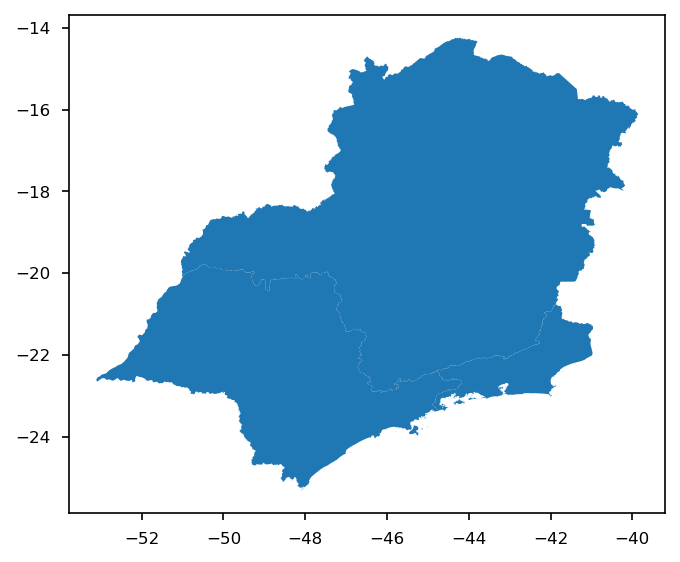

In [111]:
se_shp.plot();

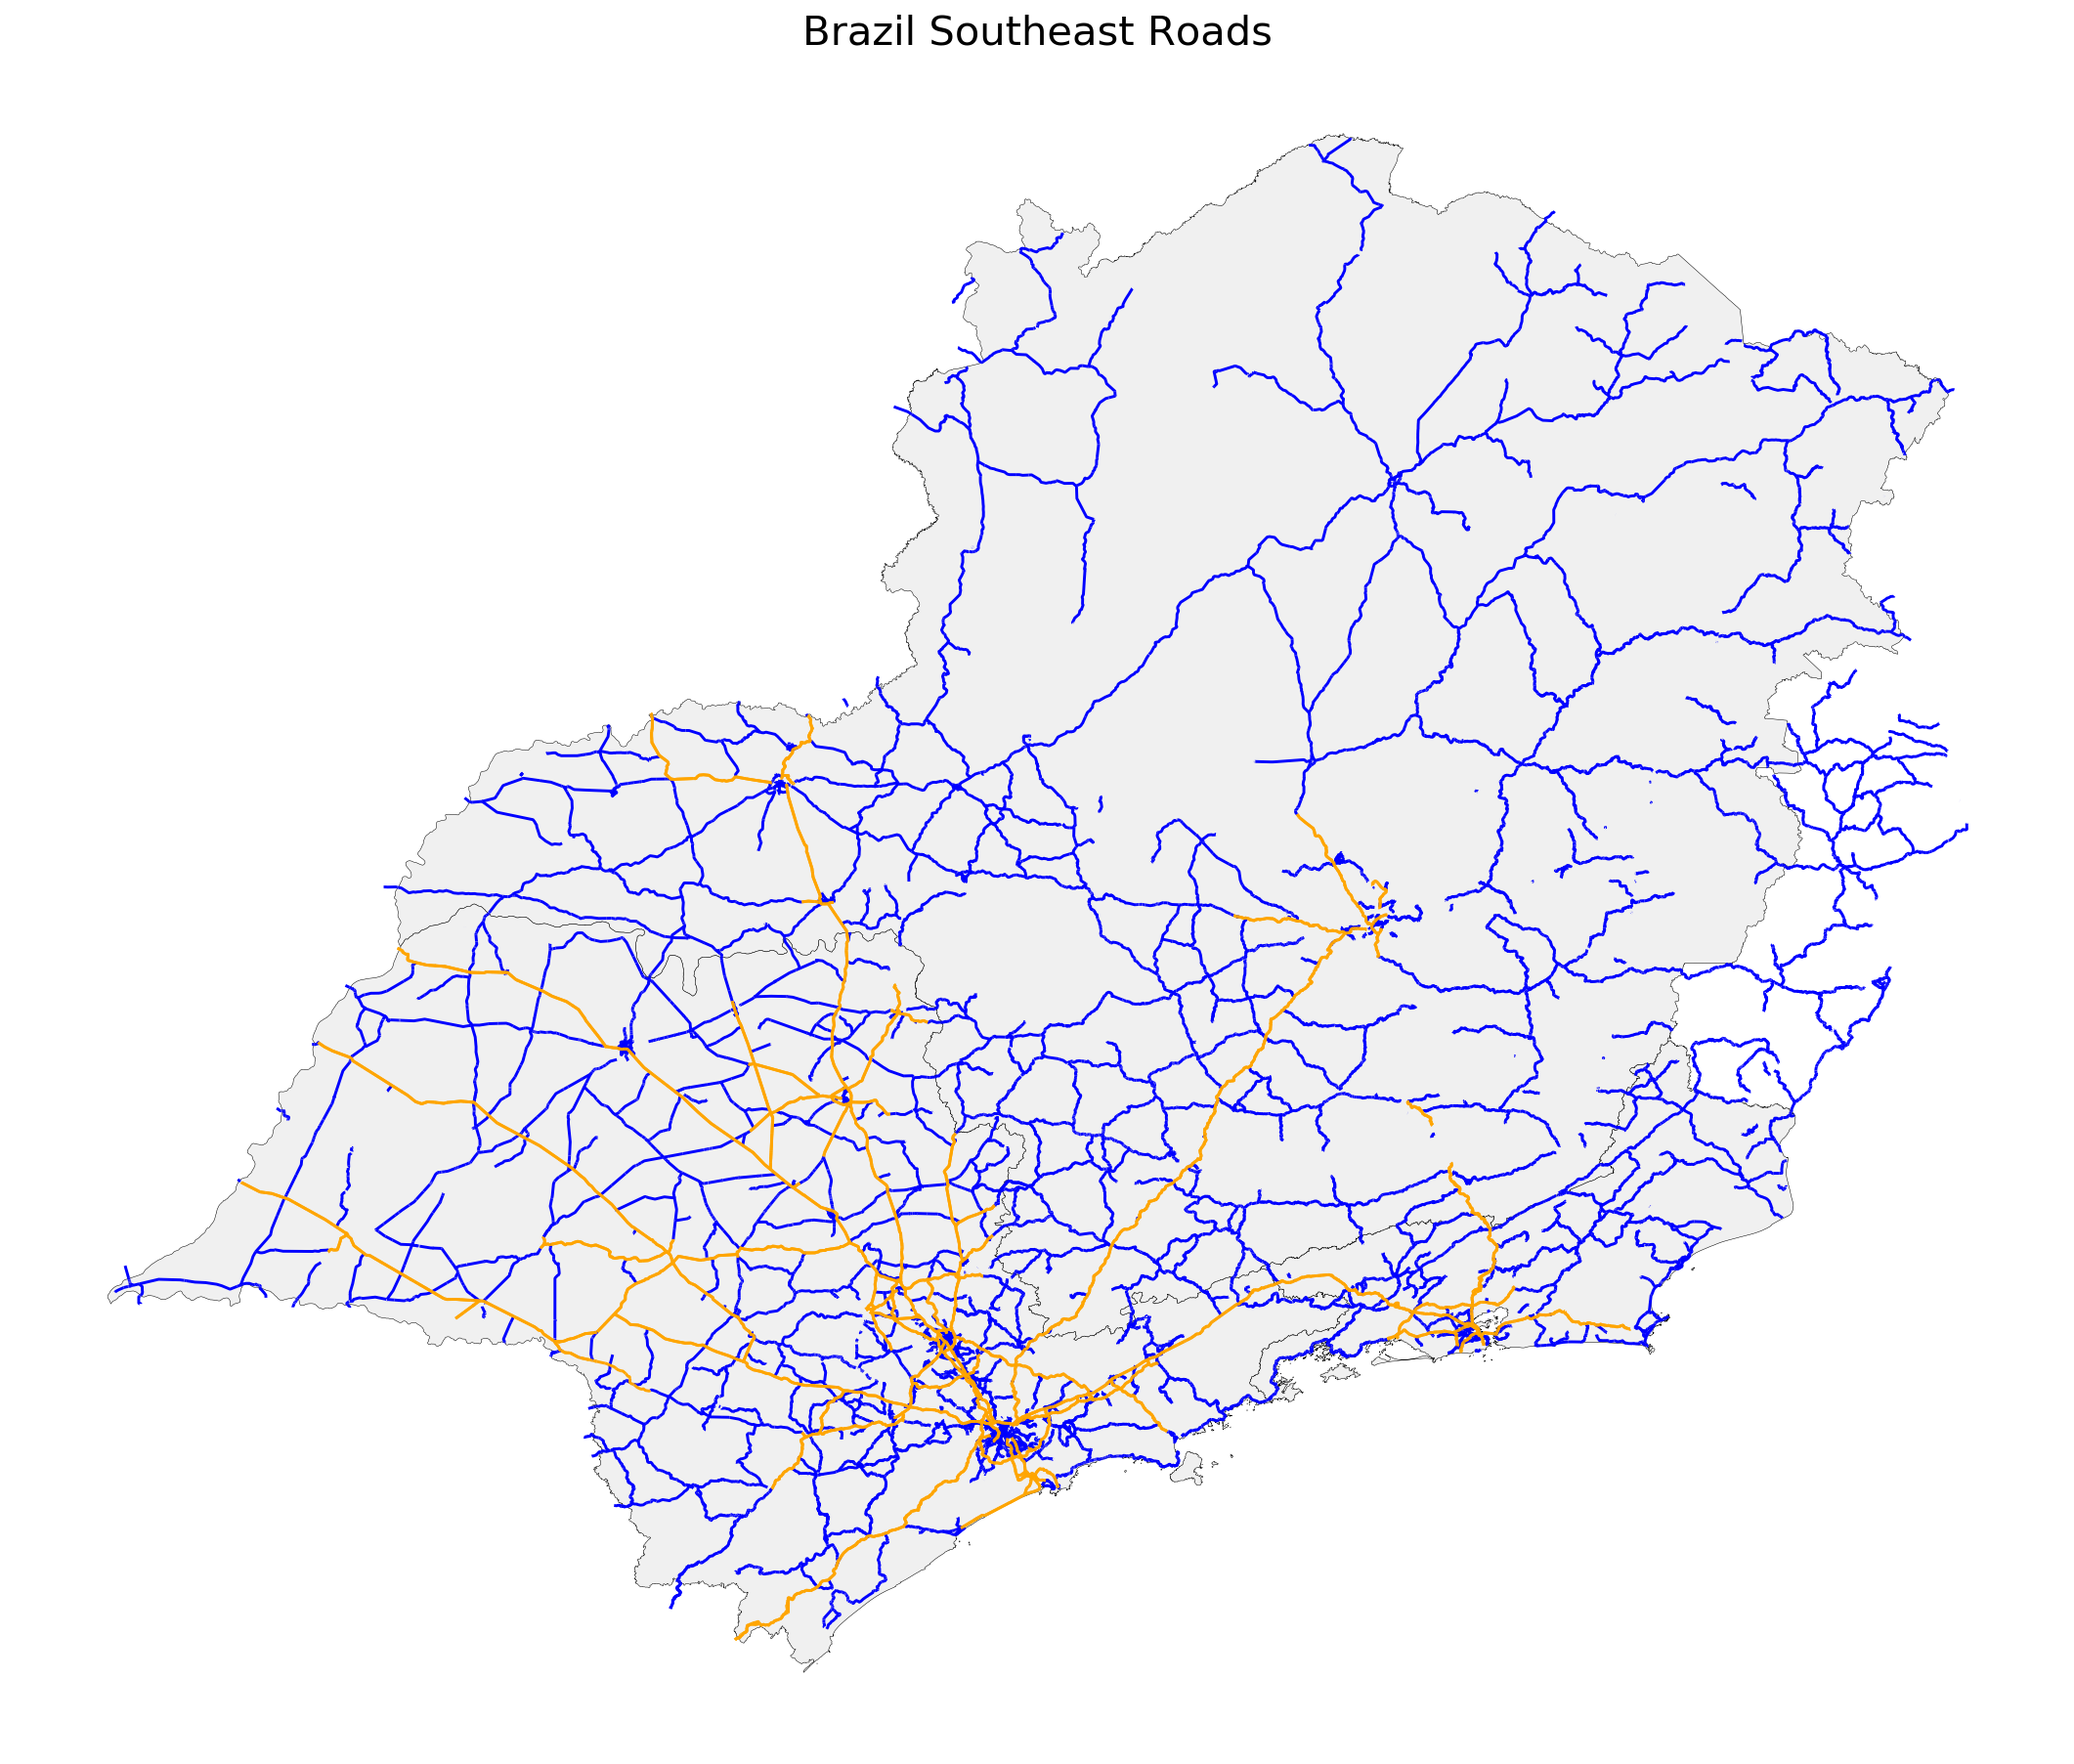

In [112]:
ax = se_shp.plot(figsize=(18, 16), color='#F0F0F0', edgecolor='#000000')
se_primary.plot(ax=ax, color="blue")
se_motorway.plot(ax=ax, color="orange", markersize=5)
plt.title("Brazil Southeast Roads", fontsize = 20);
plt.axis('off');

In [126]:
se_primary.to_file('../data_out/10_geodata/30_roads/se_primary.shp')
se_motorway.to_file('../data_out/10_geodata/30_roads/se_motorway.shp')

**NorthEast Roads**

In [127]:
file = '../OSM/nordeste-latest-free/gis_osm_roads_free_1.shp'

ne_roads_shp = gpd.read_file(file, encoding = 'utf-8')
ne_roads_shp.shape

(982532, 11)

In [128]:
ne_motorway = ne_roads_shp.loc[ne_roads_shp.fclass == 'motorway'].copy()
ne_motorway.shape

(887, 11)

In [129]:
ne_primary = ne_roads_shp.loc[ne_roads_shp.fclass == 'primary'].copy()
ne_primary.shape

(22835, 11)

In [130]:
# liberating memory
lst = [ne_roads_shp]
del ne_roads_shp
del lst

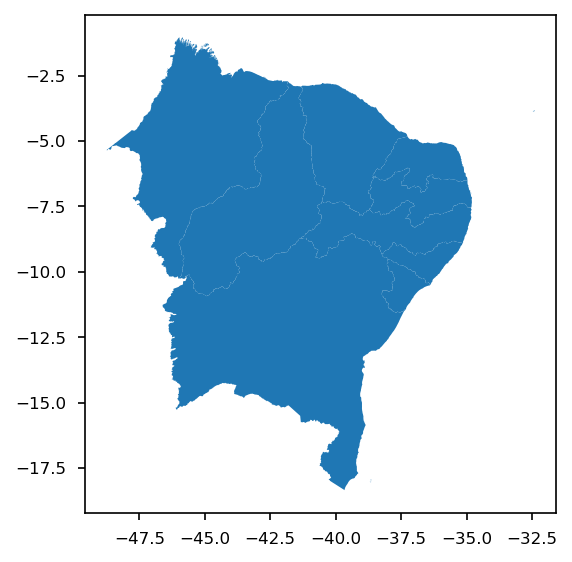

In [131]:
ne_shp = br_shp.loc[(br_shp['NM_REGIAO'] == 'NORDESTE')].copy()
ne_shp = ne_shp.to_crs({'init': 'epsg:4326'})

ne_shp.plot();

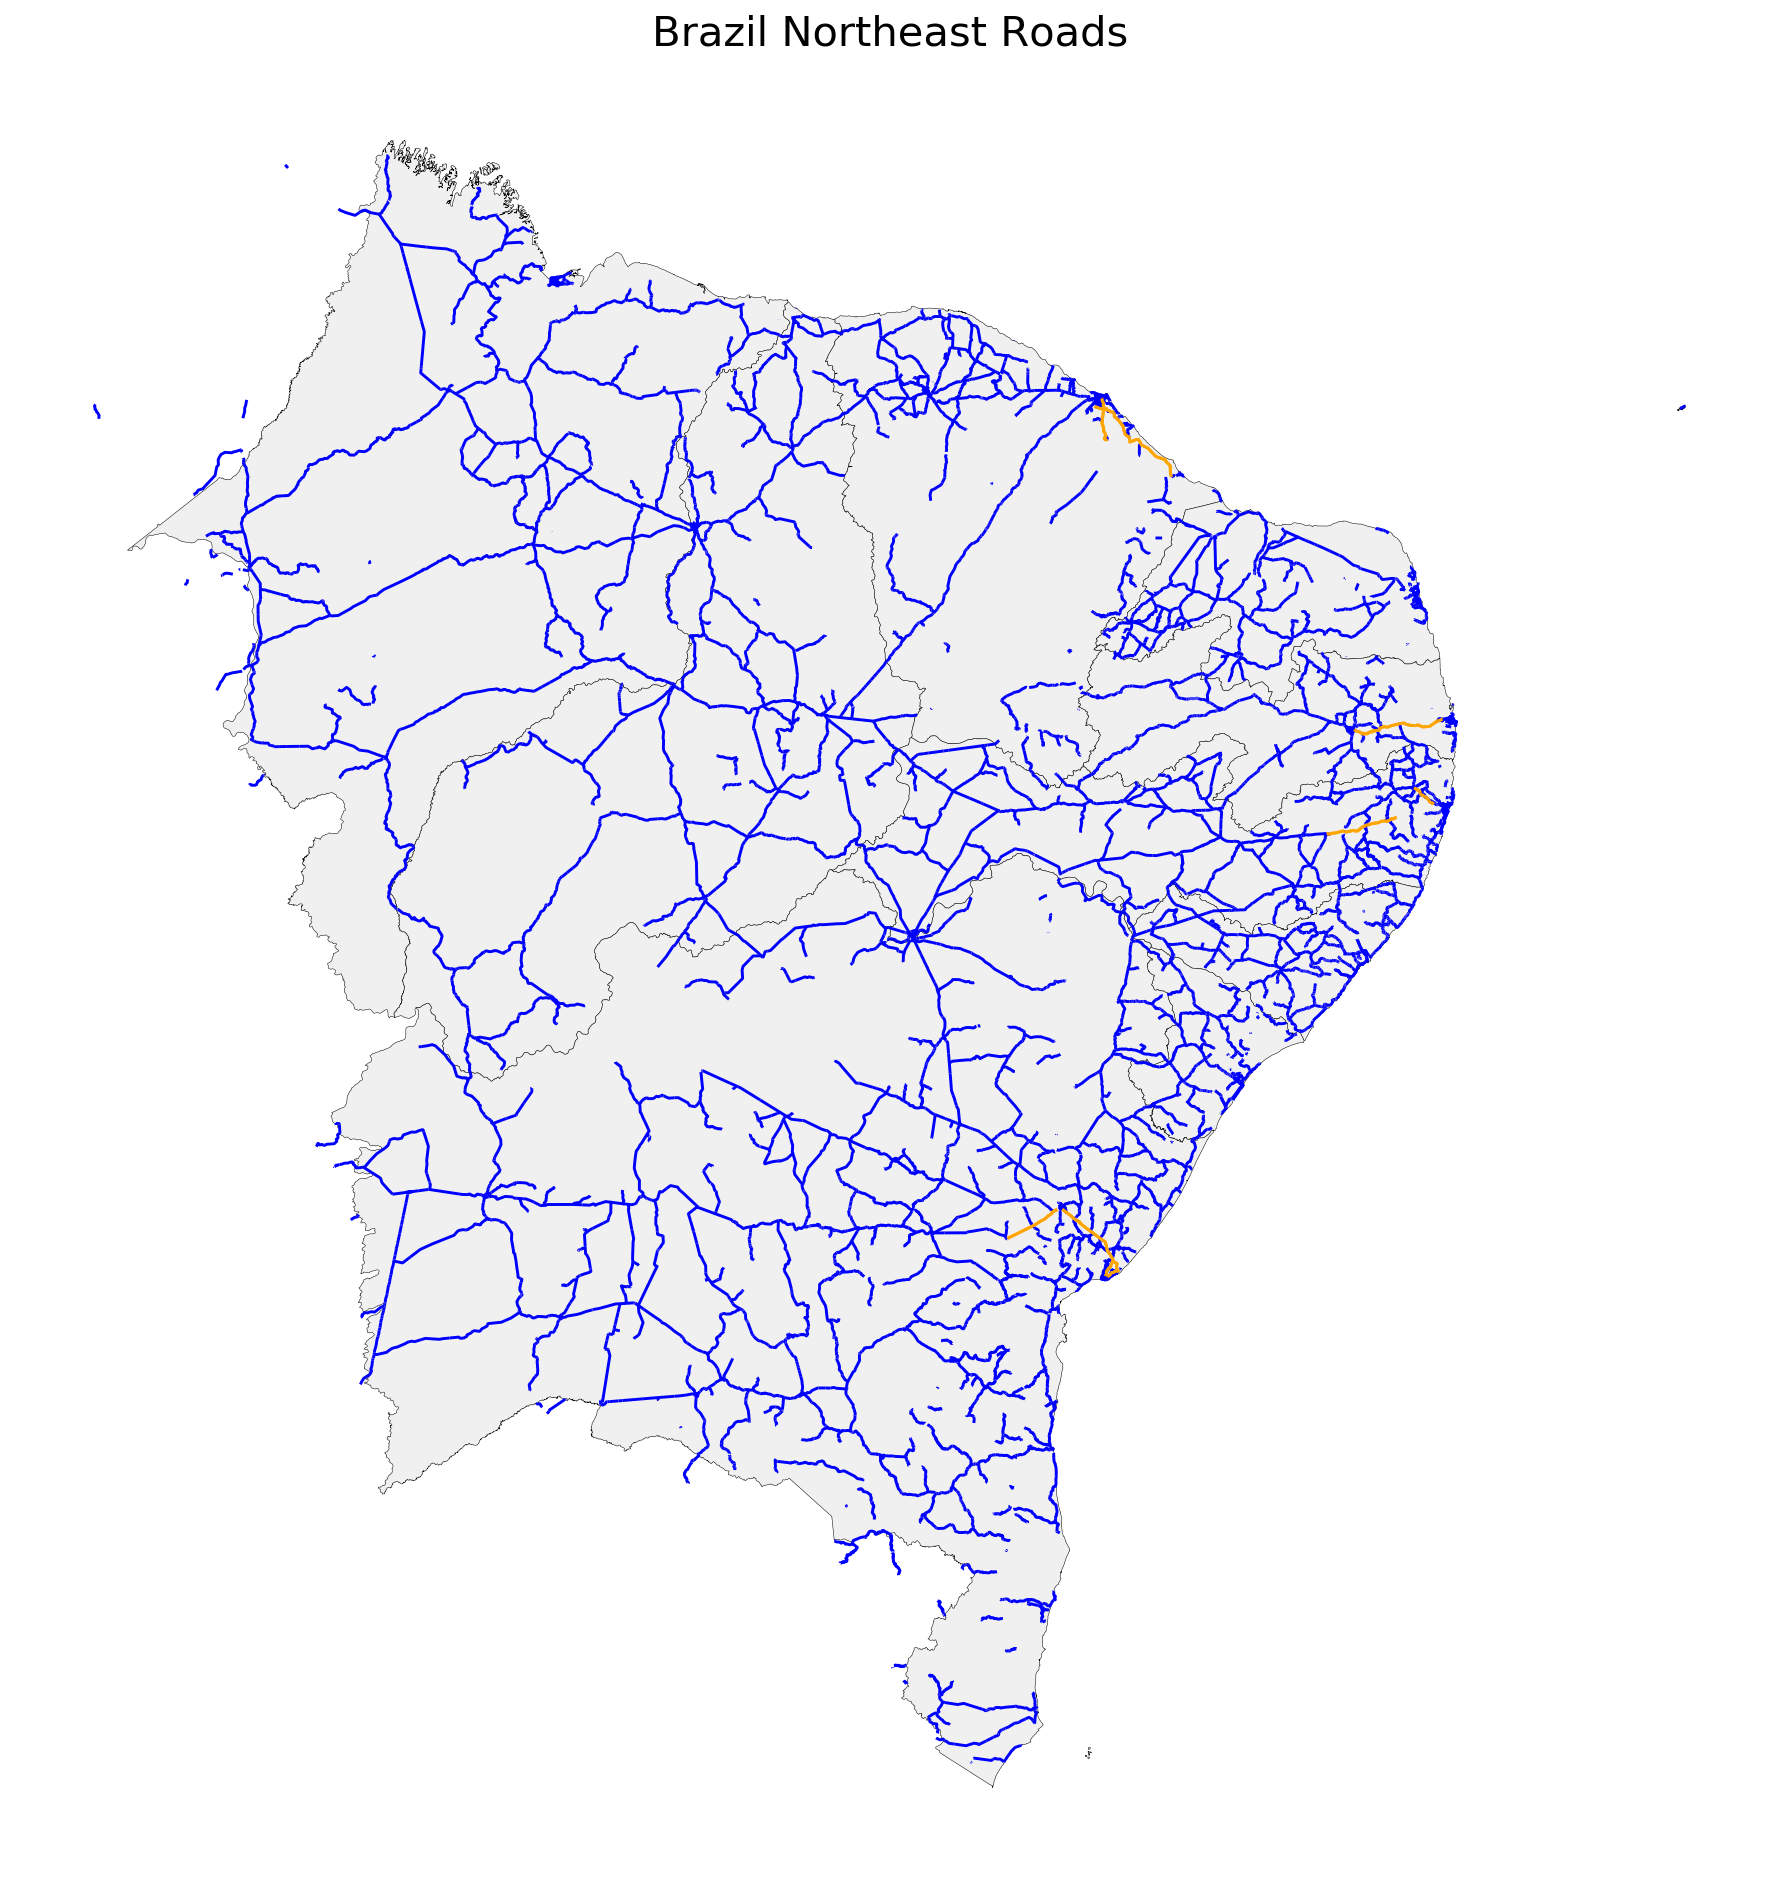

In [132]:
ax = ne_shp.plot(figsize=(18, 16), color='#F0F0F0', edgecolor='#000000')
ne_primary.plot(ax=ax, color="blue")
ne_motorway.plot(ax=ax, color="orange", markersize=5)
plt.title("Brazil Northeast Roads", fontsize = 20);
plt.axis('off');

In [133]:
ne_primary.to_file('../data_out/10_geodata/30_roads/ne_primary.shp')
ne_motorway.to_file('../data_out/10_geodata/30_roads/ne_motorway.shp')

### Looking Sao Paulo State

In [134]:
sp_shp = se_shp.loc[se_shp['COD. UF'] == 35].copy()
sp_shp = sp_shp.to_crs({'init': 'epsg:4326'})

In [135]:
sp_motorway = gpd.sjoin(se_motorway, sp_shp, op='intersects')

In [136]:
sp_primary = gpd.sjoin(se_primary, sp_shp, op='intersects')

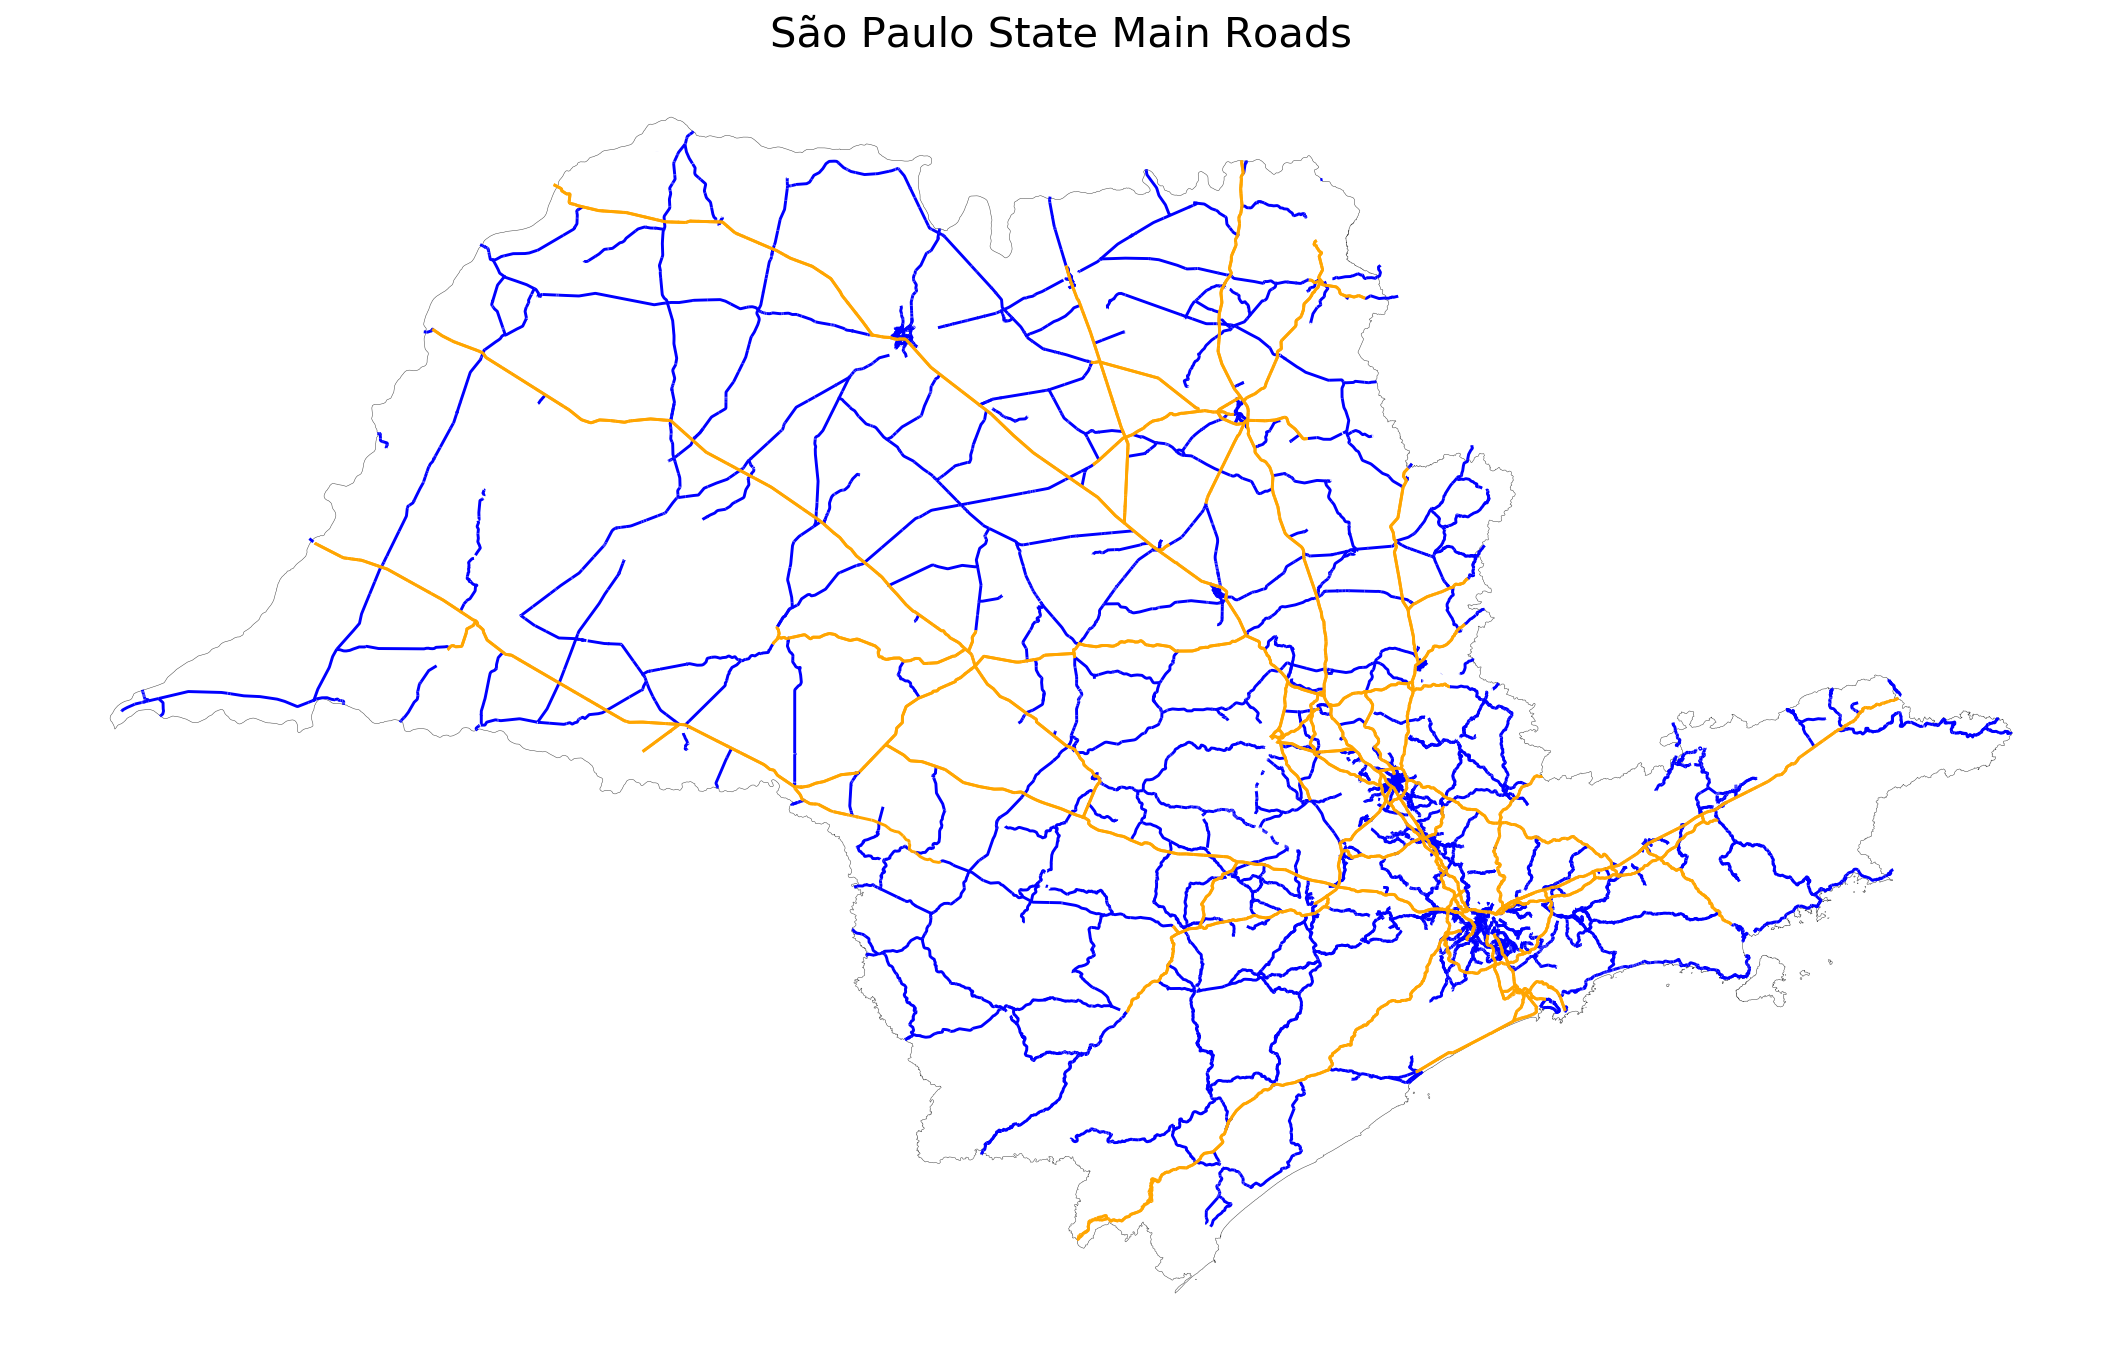

In [137]:
ax = sp_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
sp_primary.plot(ax=ax, color="blue", markersize=1)
sp_motorway.plot(ax=ax, color="orange", markersize=1)
plt.title("São Paulo State Main Roads", fontsize = 20);
plt.axis('off');

### Looking Minas Gerais State

In [138]:
mg_shp = se_shp.loc[se_shp['COD. UF'] == 31].copy()
mg_shp = mg_shp.to_crs({'init': 'epsg:4326'})

In [139]:
mg_motorway = gpd.sjoin(se_motorway, mg_shp, op='intersects')

In [140]:
mg_primary = gpd.sjoin(se_primary, mg_shp, op='intersects')

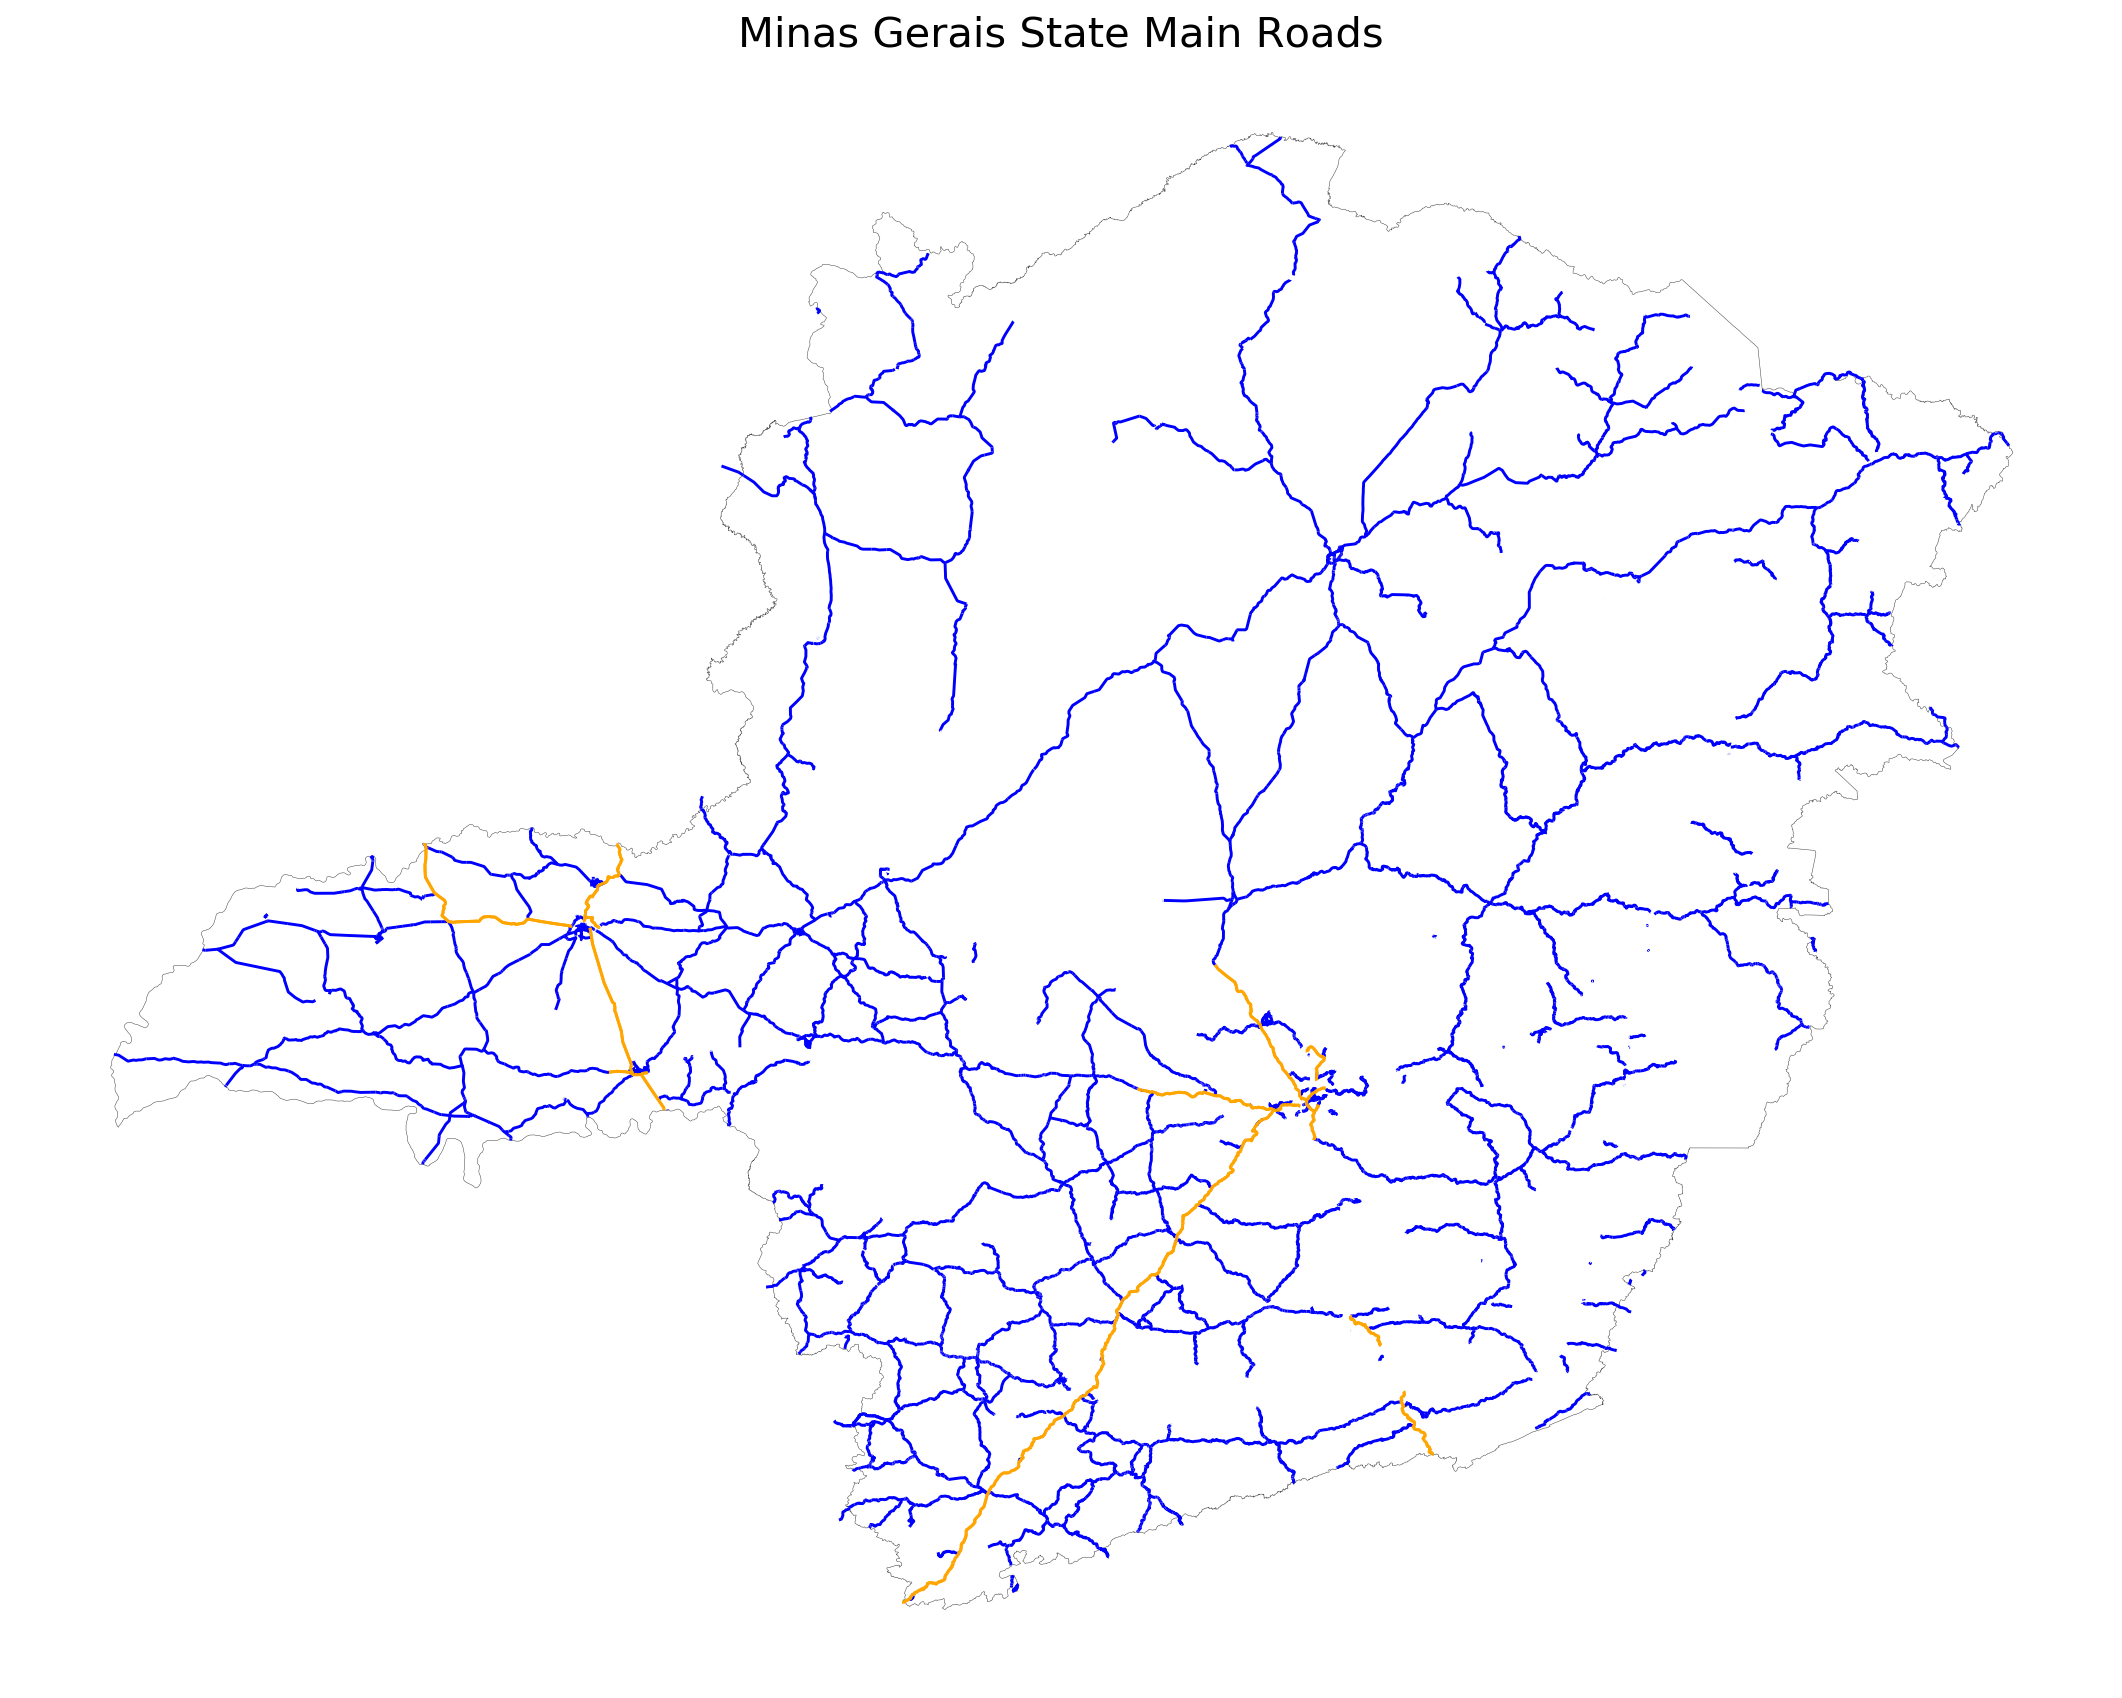

In [141]:
ax = mg_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
mg_primary.plot(ax=ax, color="blue", markersize=1)
mg_motorway.plot(ax=ax, color="orange", markersize=1)
plt.title("Minas Gerais State Main Roads", fontsize = 20);
plt.axis('off');

### Looking Rio de Janeiro State

In [142]:
rj_shp = se_shp.loc[se_shp['COD. UF'] == 33].copy()
rj_shp = rj_shp.to_crs({'init': 'epsg:4326'})

In [143]:
rj_motorway = gpd.sjoin(se_motorway, rj_shp, op='intersects')

In [144]:
rj_primary = gpd.sjoin(se_primary, rj_shp, op='intersects')

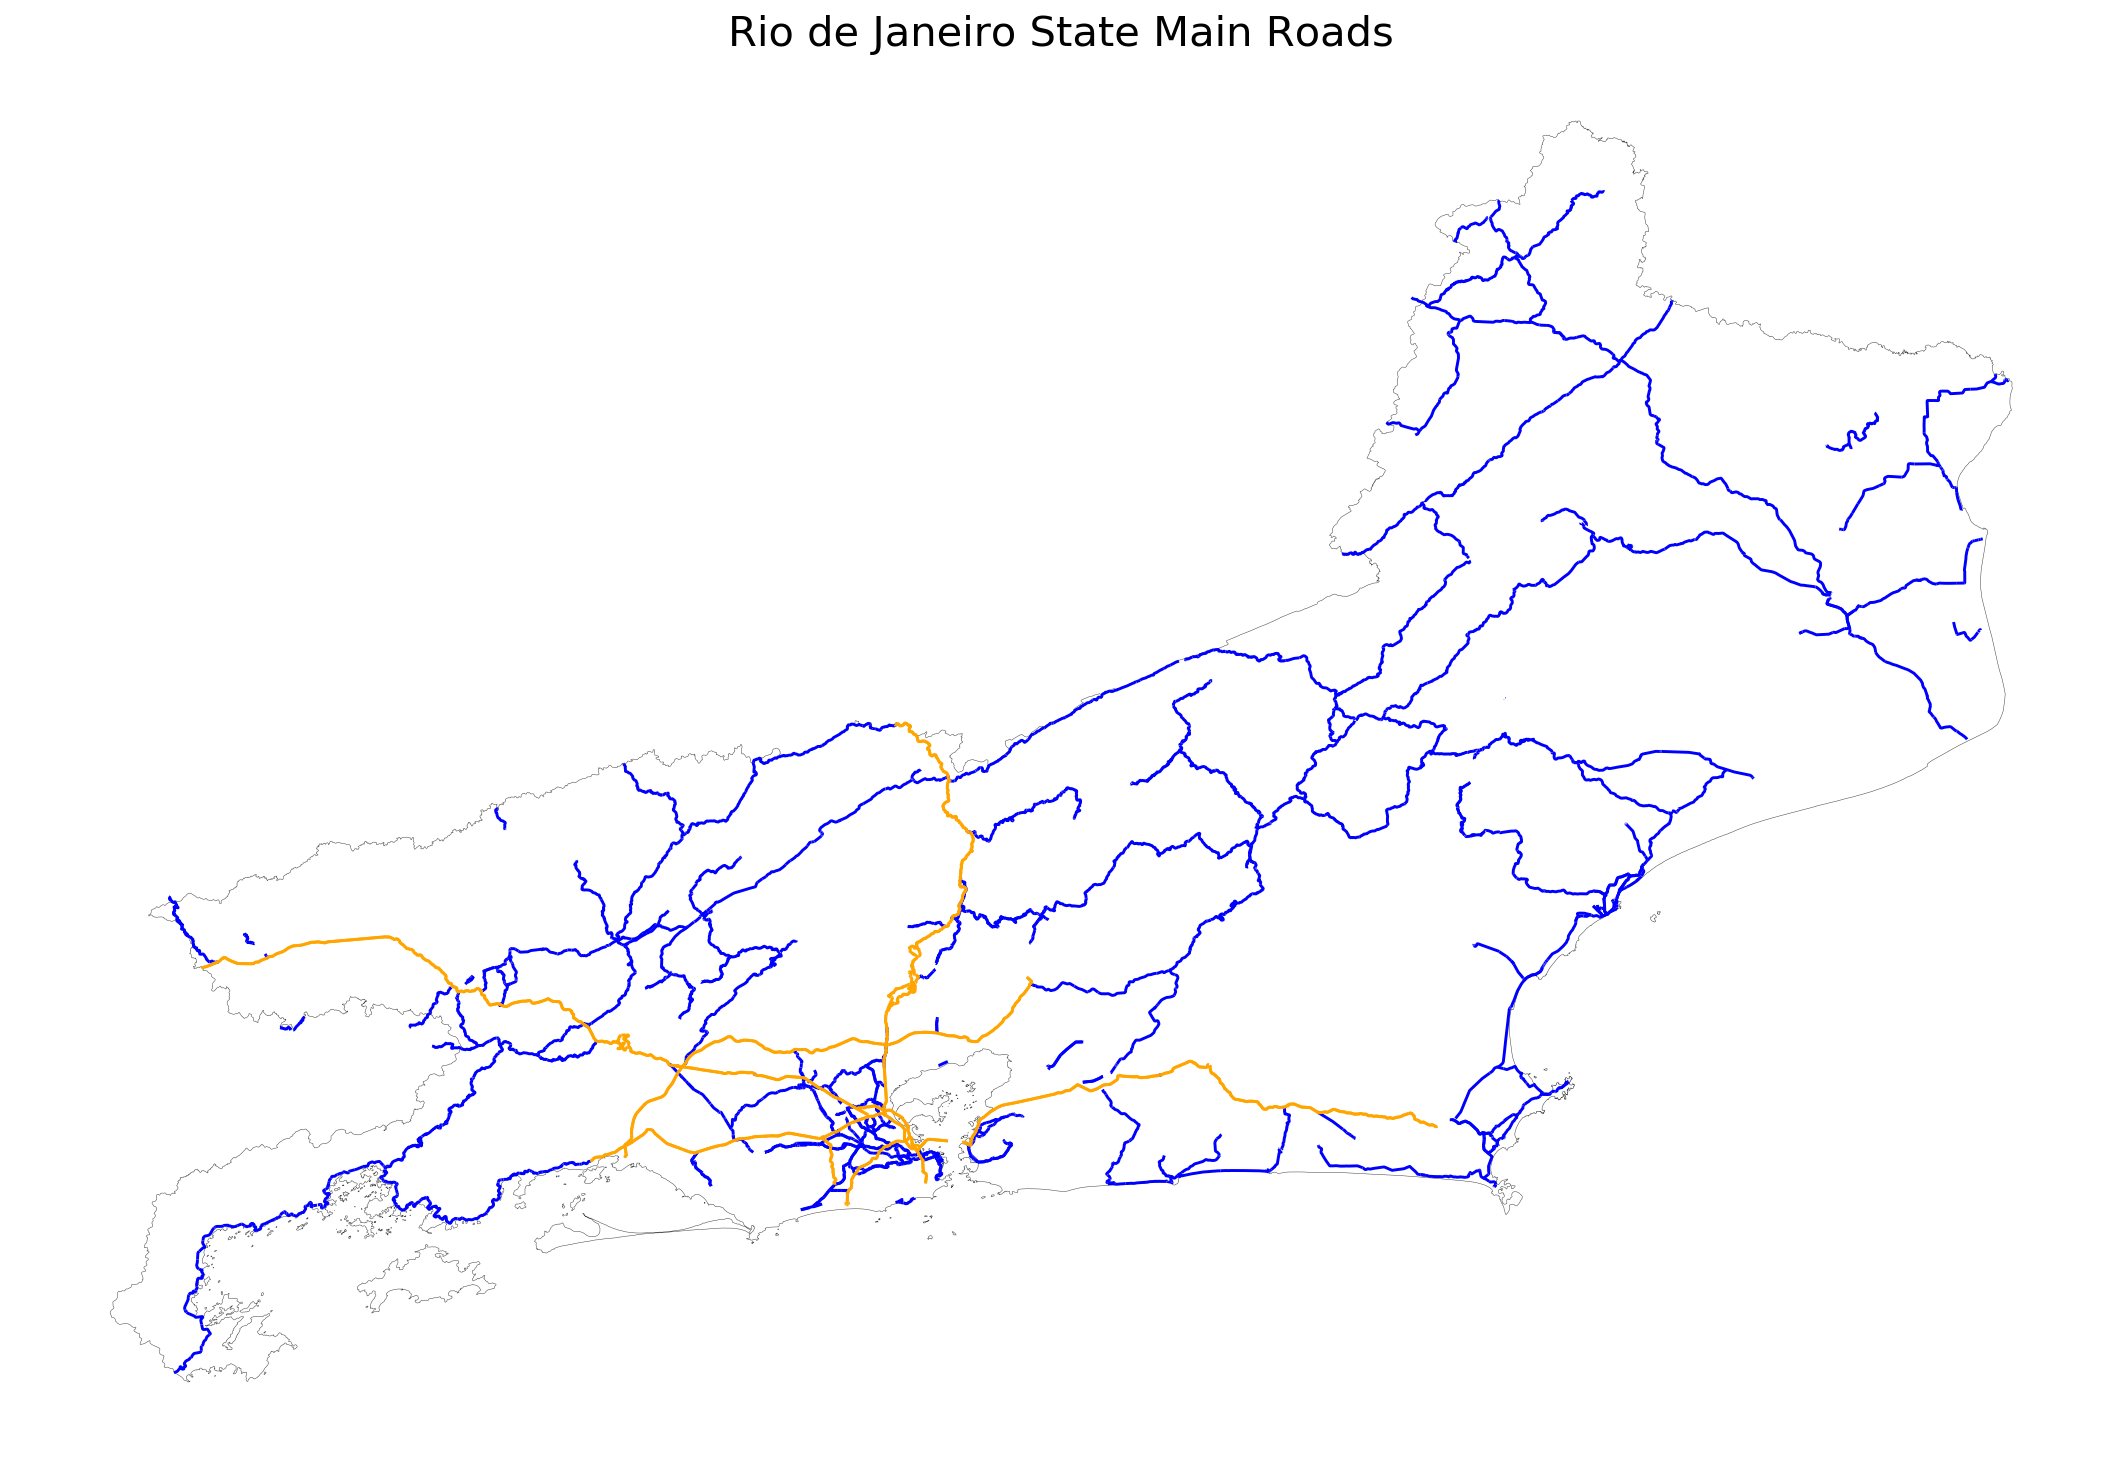

In [145]:
ax = rj_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
rj_primary.plot(ax=ax, color="blue", markersize=1)
rj_motorway.plot(ax=ax, color="orange", markersize=1)
plt.title("Rio de Janeiro State Main Roads", fontsize = 20);
plt.axis('off');

### Looking Ceará State

In [146]:
ce_shp = ne_shp.loc[ne_shp['COD. UF'] == 23].copy()
ce_shp = ce_shp.to_crs({'init': 'epsg:4326'})

In [147]:
ce_motorway = gpd.sjoin(ne_motorway, ce_shp, op='intersects')

In [148]:
ce_primary = gpd.sjoin(ne_primary, ce_shp, op='intersects')

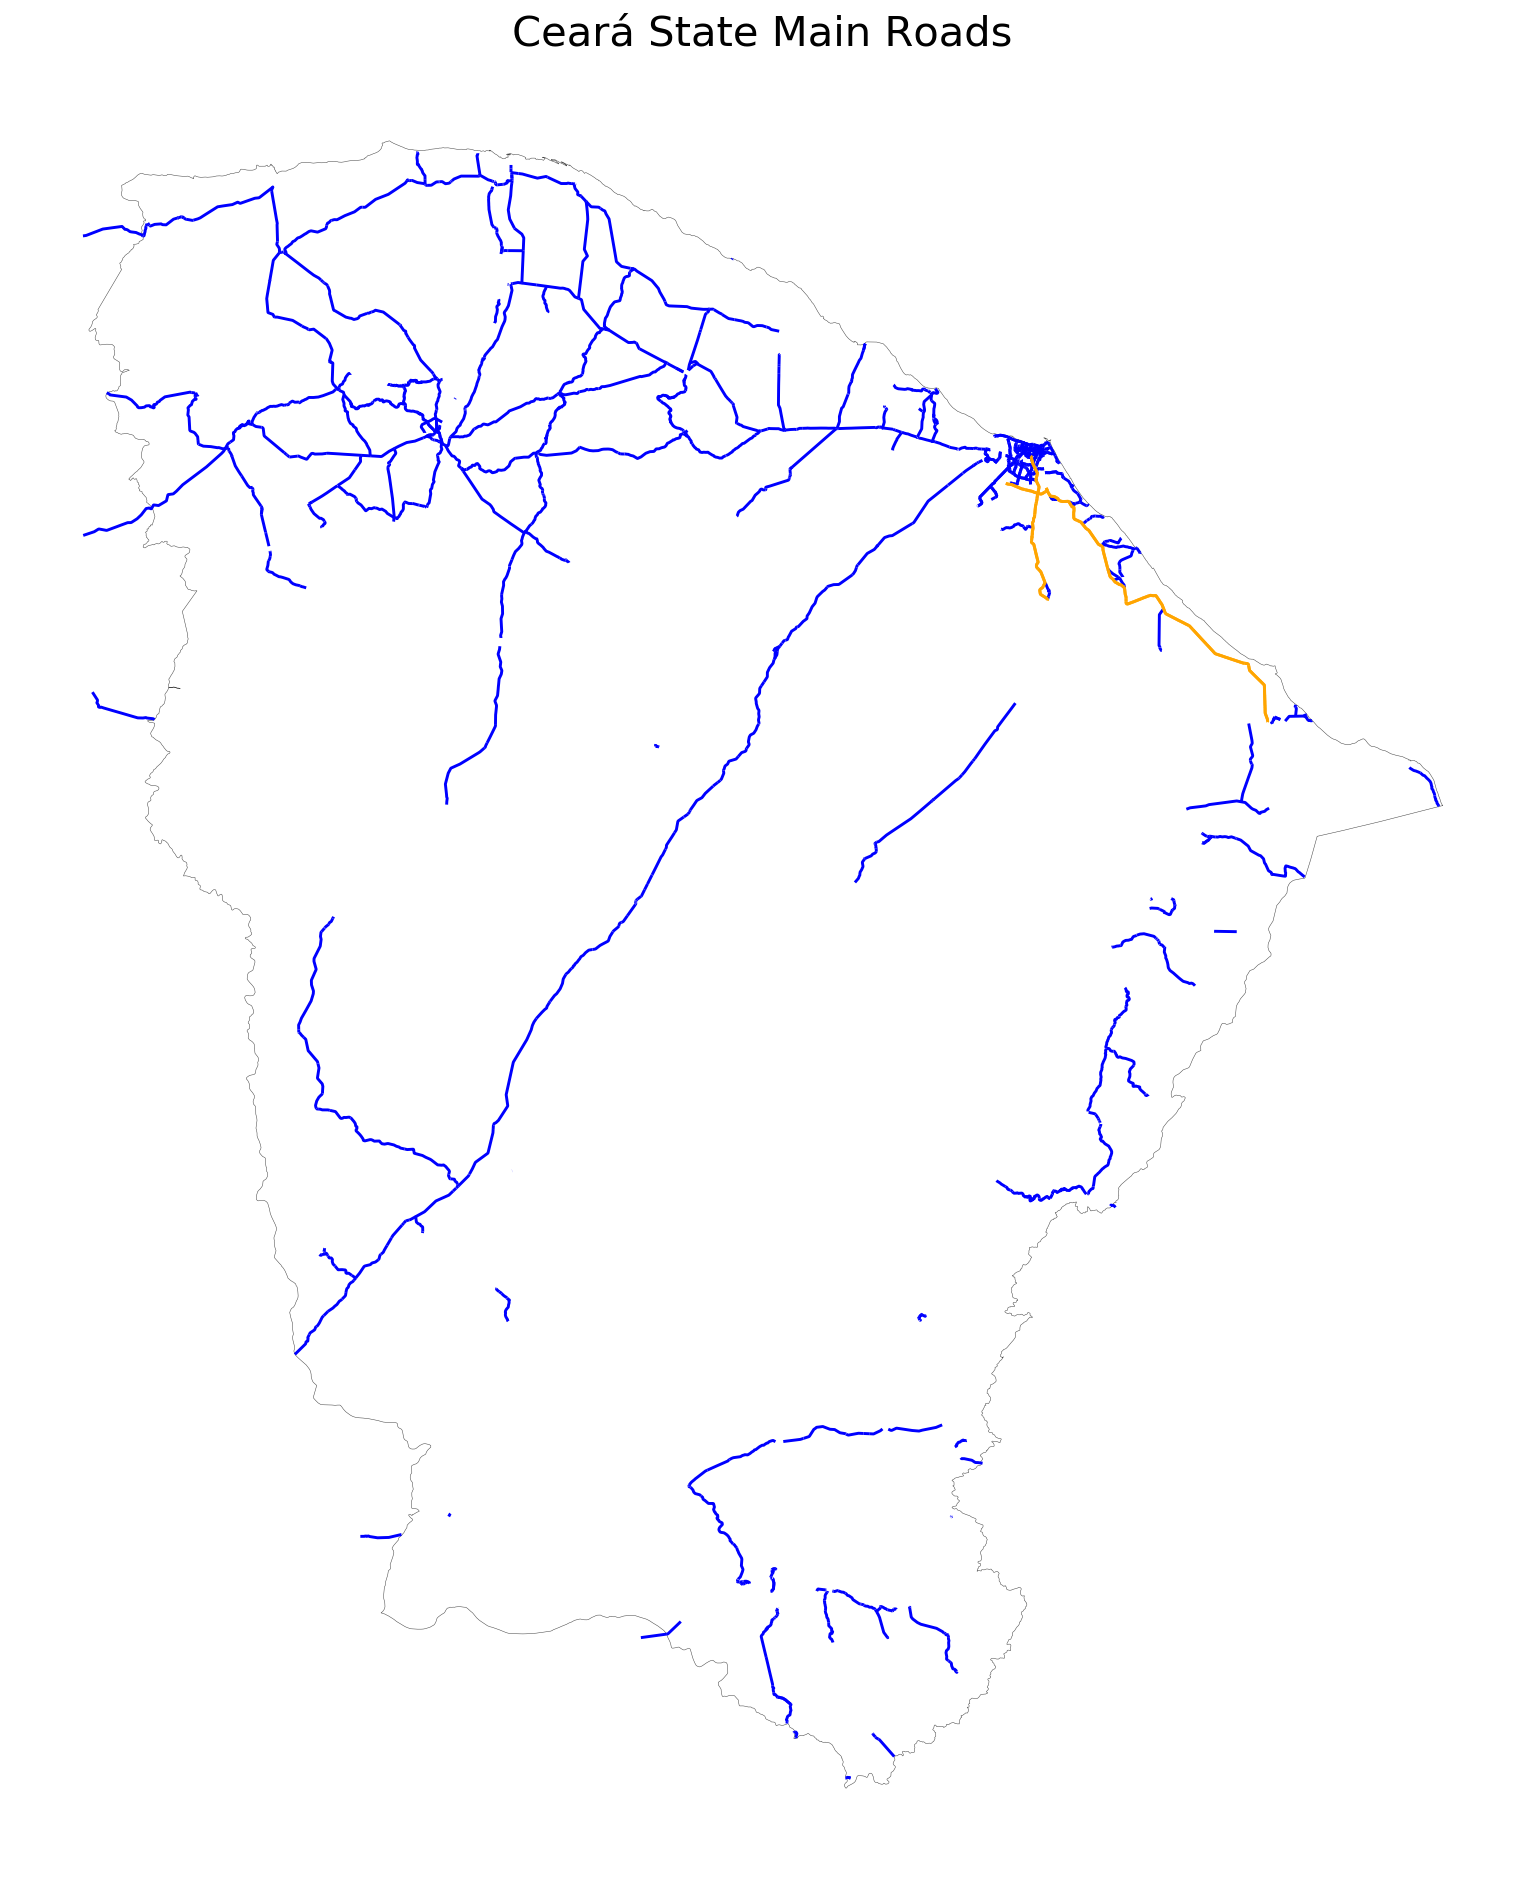

In [149]:
ax = ce_shp.plot(figsize=(18, 16), color='#FFFFFF', edgecolor='#444444')
ce_primary.plot(ax=ax, color="blue", markersize=1)
ce_motorway.plot(ax=ax, color="orange", markersize=1)
plt.title("Ceará State Main Roads", fontsize = 20);
plt.axis('off');

In [150]:
sp_primary.to_file('../data_out/10_geodata/35_main_roads_by_state/sp_primary.shp')
sp_motorway.to_file('../data_out/10_geodata/35_main_roads_by_state/sp_motorway.shp')

In [151]:
rj_primary.to_file('../data_out/10_geodata/35_main_roads_by_state/rj_primary.shp')
rj_motorway.to_file('../data_out/10_geodata/35_main_roads_by_state/rj_motorway.shp')

In [153]:
mg_primary.to_file('../data_out/10_geodata/35_main_roads_by_state/mg_primary.shp')
mg_motorway.to_file('../data_out/10_geodata/35_main_roads_by_state/mg_motorway.shp')

In [154]:
ce_primary.to_file('../data_out/10_geodata/35_main_roads_by_state/ce_primary.shp')
ce_motorway.to_file('../data_out/10_geodata/35_main_roads_by_state/ce_motorway.shp')